# Problema 3: Calibración de sensor de distancia

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## 1.- Análisis de datos

Dimension x: (1000,)
Dimension y: (1000,)


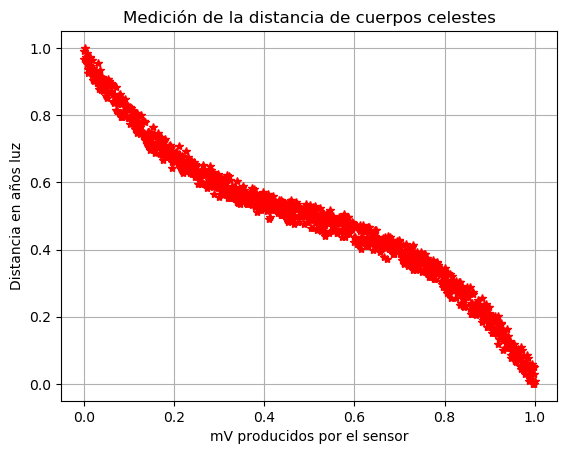

In [5]:
#Cargar datos
data = np.load('datos/datos_p3.npy')

#Extraer informacion
x = data[:, 0]
y = data[:, 1]

print("Dimension x: "+str(x.shape[:]))
print("Dimension y: "+str(y.shape[:]))

#normalizar x
x=x-np.min(x)
x=x/np.max(x)

#normalizar y
y=y-np.min(y)
y=y/np.max(y)

#Graficar valores
plt.title("Medición de la distancia de cuerpos celestes")
plt.xlabel("mV producidos por el sensor")
plt.ylabel("Distancia en años luz")
plt.plot(x, y, '*', color='r');
plt.grid()
plt.show()

## 2.- Definición del modelo

In [6]:
#Error medio cuadratico
def emc(ym, yd):
    e=0.5*np.power(ym-yd,2)
    return e

In [7]:
#crear modelo
class cubica():
    #constructor
    def __init__(self,a,b,c,d):
        #Inicializar parametros del modelo
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    
    #Procesamiento (forward pass)
    def forward(self,x):
        
        ym=self.a*np.power(x,3)+self.b*np.power(x,2)+self.c*x+self.d
        
        return ym
    
    #metodo de entrenamiento
    def train(self,x,y,Lr,epoch):
        
        #inicializar el error
        self.e=np.zeros(epoch)
        
        #lazo.epocas
        for i in range(epoch):
            
            #lazo de los datos
            for j in range(x.shape[0]):
                
                #obtener datos de entrada
                x_in=x[j]
                yd=y[j]
                
                #obtener salida del modelo
                ym=self.a*np.power(x_in,3)+self.b*np.power(x_in,2)+self.c*x_in+self.d
                
                #gradientes de la funcion de error
                de_ym=(ym-yd)
                
                #gradientes del modelo
                dym_a=np.power(x_in,3)
                dym_b=np.power(x_in,2)
                dym_c=x_in
                dym_d=1
                
                #calcular gradientes de variables
                de_a=de_ym*dym_a
                de_b=de_ym*dym_b
                de_c=de_ym*dym_c
                de_d=de_ym*dym_d
                
                #actualizar parametros
                self.a=self.a-Lr*de_a
                self.b=self.b-Lr*de_b
                self.c=self.c-Lr*de_c
                self.d=self.d-Lr*de_d

                
                #calcular error
                self.e[i]=self.e[i]+emc(ym,yd)
            
            #promediar error de la epoca
            self.e[i]=self.e[i]/x.shape[0]

## 3.- Creación del modelo

In [8]:
#crear instancia del modelo
sensores=cubica(-2.0,3.0,-2.0,1.0)

## 4.- Entrenamiento del modelo

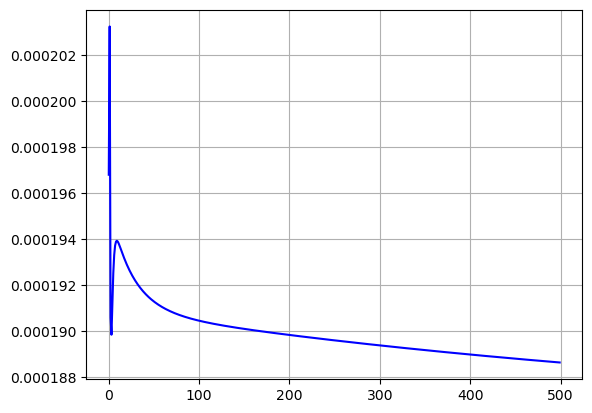

In [9]:
#entrenar modelo
sensores.train(x,y,0.01,500)


#imprimir error
plt.figure(1)
plt.plot(sensores.e,"b")
plt.grid()
plt.show()

Dimension de la entrada: (1000,)
Parametros FINALES: 
 a: -2.0553670350972117
 b: 3.1087504505265025
 c: -1.996317329989206
 d: 0.972550544221964
Error: 0.00019446646615449154


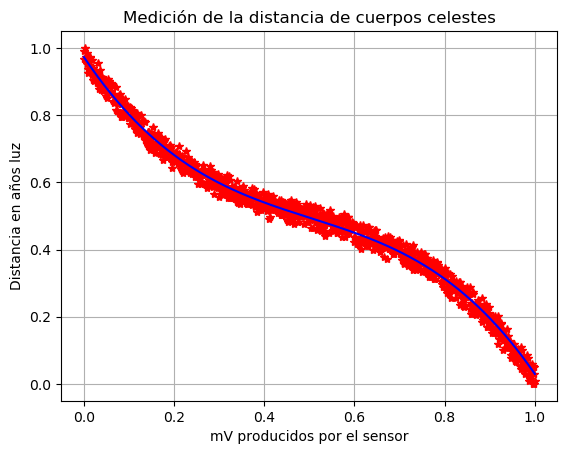

In [10]:
#Inicializar salida del modelo
ym=np.zeros(y.shape)

#inicializar el error
e=0.0

print("Dimension de la entrada: "+str(x.shape))
print ("Parametros FINALES: ")
print(" a: " + str(sensores.a))
print(" b: " + str(sensores.b))
print(" c: " + str(sensores.c))
print(" d: " + str(sensores.d))

#Evaluar modelo en datos
for i in range(x.shape[0]):
    ym[i]=sensores.forward(x[i])
    
    #calcular error de la entrada
    e=e+emc(ym[i],y[i])

#calcular error promedio
e=e/x.shape[0]


#imprimir error
print("Error: "+ str(e))

#graficar
plt.title("Medición de la distancia de cuerpos celestes")
plt.xlabel("mV producidos por el sensor")
plt.ylabel("Distancia en años luz")
plt.plot(x, y, '*', color='r');
plt.plot(x[:], ym[:], color='blue');
plt.grid()
plt.show()